In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold

In [3]:
from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler)
from sklearn.svm import LinearSVC

In [4]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Cargando banco de datos MNist

In [5]:
digits = load_digits().data
digits_target = load_digits().target

In [6]:
digits.shape

(1797, 64)

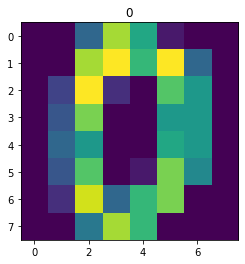

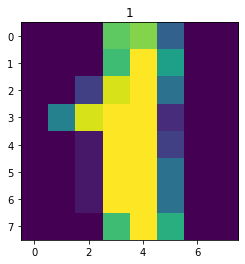

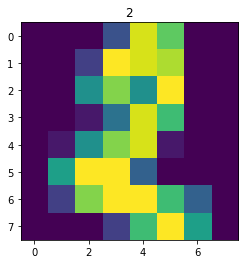

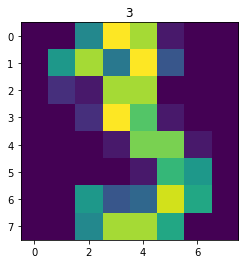

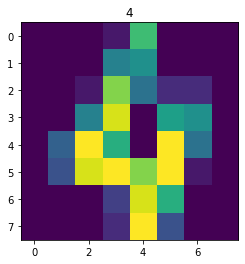

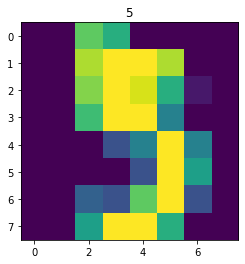

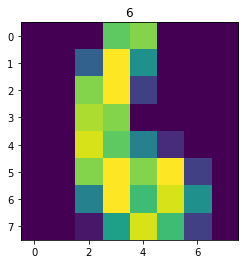

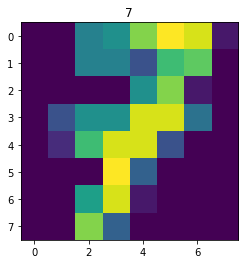

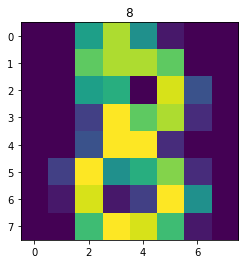

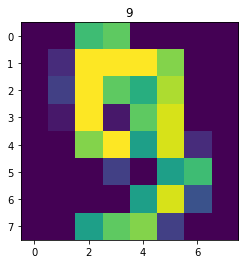

In [7]:
for i in range(10):
    plt.title(digits_target[i])
    plt.imshow(digits[i, :].reshape((8,8)))
    plt.show()

In [8]:
pca = PCA(n_components=64)
digitss = StandardScaler().fit_transform(digits)
pca.fit(X=digitss)
X_transform = pca.transform(X=digitss)

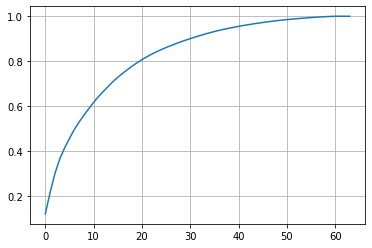

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(X=X_transform, y=digits_target)
X_lda = lda.transform(X=X_transform)

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


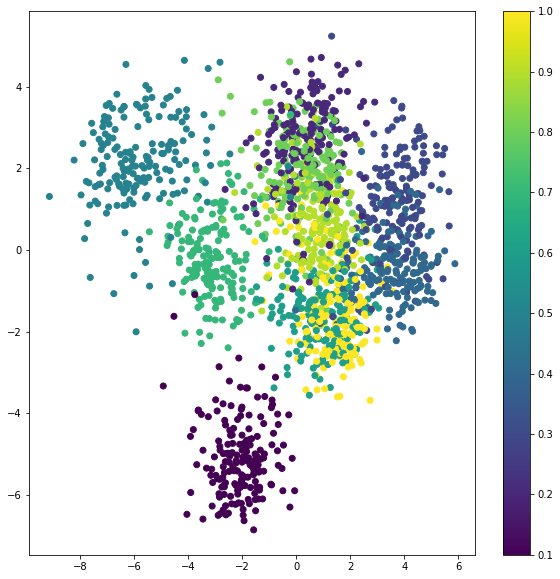

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=(digits_target + 1) / 10)
plt.colorbar()
plt.show()

In [12]:
import numpy as np
from mayavi.mlab import *

In [13]:
def test_points3d(x, y, z, s):
    # t = np.linspace(0, 4 * np.pi, 20)
    # x = np.sin(2 * t)
    # y = np.cos(t)
    # z = np.cos(2 * t)
    # s = 2 + np.sin(t)
    return points3d(x, y, z, s, colormap="copper", scale_factor=.25)

test_points3d(X_lda[:, 2], X_lda[:, 4], X_lda[:, 5], (digits_target + 1) / 10.)

In [14]:
import pandas as pd

In [15]:
X = pd.DataFrame(data=X_transform)
X["target"] = digits_target

In [32]:
corr_mat = X.corr()

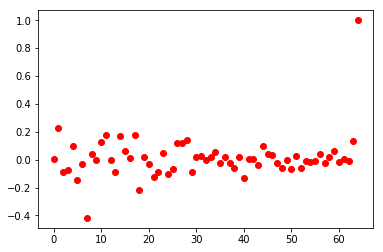

In [39]:
plt.plot(np.arange(65), corr_mat.values[-1:, :].reshape(-1,), "ro")

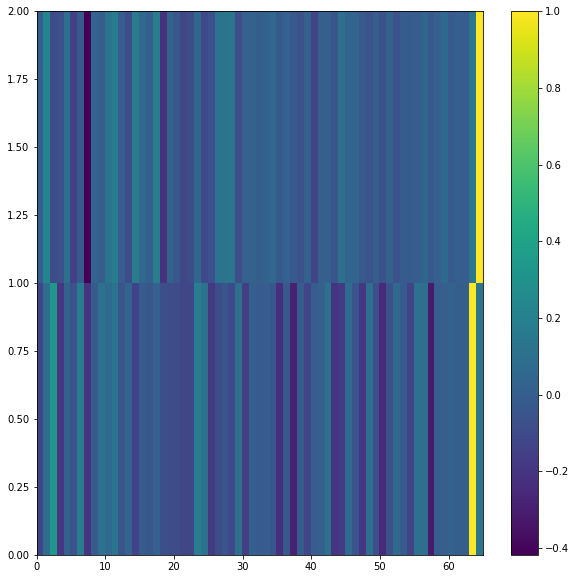

In [36]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_mat.values[-2:, :])
plt.colorbar()
plt.show()

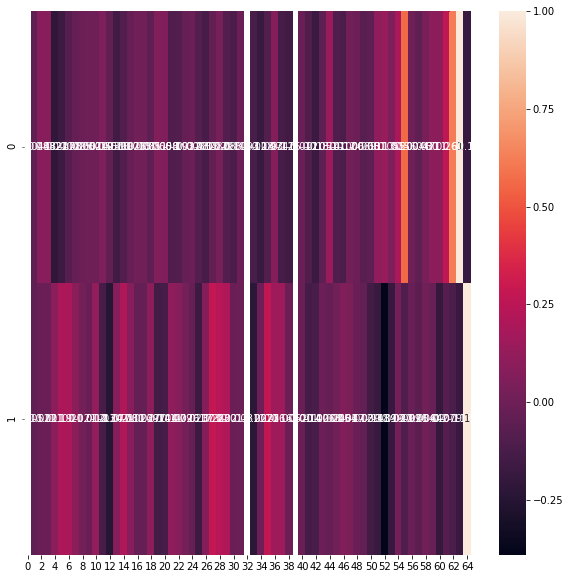

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat.values[-2:, :], annot=True)

In [40]:
digits_target = LabelEncoder().fit_transform(y=digits_target)

In [41]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

# Probando maquina de soporte vectorial con kernel lineal y LDA como extraccion de caracteristicas

In [17]:
svc = LinearSVC(C=0.1)
#lda.fit(X=X_transform, y=digits_target)

In [18]:
from sklearn.model_selection import train_test_split

# Nivelando las muestras para cada clase

In [19]:
grupos = []
for i in range(10):
    elementos_clase = list(map(lambda x: i == x, digits_target))
    grupos.append(elementos_clase)
    print(np.where(elementos_clase))
    print(i, np.sum(elementos_clase))

(array([   0,   10,   20,   30,   36,   48,   49,   55,   72,   78,   79,
        101,  126,  130,  140,  150,  160,  166,  178,  179,  185,  202,
        208,  209,  229,  252,  256,  266,  276,  286,  292,  304,  305,
        311,  328,  334,  335,  357,  382,  386,  396,  406,  416,  422,
        434,  435,  441,  458,  464,  465,  487,  512,  516,  526,  536,
        546,  552,  564,  565,  571,  588,  594,  595,  617,  642,  646,
        656,  666,  676,  682,  694,  695,  701,  718,  724,  725,  747,
        772,  776,  786,  796,  806,  812,  824,  825,  831,  848,  854,
        855,  877,  902,  915,  925,  935,  941,  957,  974,  980,  981,
       1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082, 1099,
       1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205, 1206,
       1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317, 1323,
       1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425, 1435,
       1445, 1451, 1463, 1464, 1470, 1487, 1493, 1

In [20]:
inds = np.random.choice(np.where(elementos_clase)[0], size=109)
digits_target[inds]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

# Despues de nivelar, se construye del banco total nivelado, los bancos de entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digits, digits_target, test_size=0.33, random_state=42)

In [24]:
fitted_model = svc.fit(X_train, y_train)

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
y_predict = fitted_model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, y_predict)

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  1,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 53,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 62,  0,  0,  0,  1,  0],
       [ 0,  2,  1,  0,  0, 68,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6, 62]])

In [28]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_predict)

0.9511784511784511

In [34]:
np.mean(cross_val_score(lda, digits, digits_target, cv=5))

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9081420657064312

In [35]:
np.mean(cross_val_score(svc, digits, digits_target, cv=5))

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

0.917654319376805

# encadenando procesos

In [74]:
for Cvalue in np.logspace(-3, 2, 10):
    cv = KFold(5)
    pepe = Pipeline([
                     #('scaler', StandardScaler()),
                     ('pca', PCA(n_components=0.90)),
                     # ('lda', LinearDiscriminantAnalysis()),
                     ('classifier', LinearSVC(C=Cvalue))
                    ])
    scores = cross_val_score(estimator=pepe, X=digits, y=digits_target, cv=cv)
    print("{:=<80}".format("iteracion"))
    print(Cvalue)
    print(np.mean(scores))
    print(scores)

iteracion=======================================================================
0.001
0.8892664809656454
[0.92222222 0.84444444 0.88022284 0.94150418 0.85793872]
iteracion=======================================================================
0.003593813663804626
0.9042896935933147
[0.94166667 0.85833333 0.90250696 0.94428969 0.87465181]
iteracion=======================================================================
0.01291549665014884
0.9187527081398947
[0.95       0.88888889 0.92200557 0.94986072 0.88300836]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
0.046415888336127795
0.9237619931909625
[0.95       0.89722222 0.9275766  0.95543175 0.88857939]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
0.1668100537200059
0.9237650882079851
[0.95       0.89166667 0.93314763 0.95543175 0.88857939]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
0.5994842503189409
0.9031785824822037
[0.93055556 0.86388889 0.91086351 0.94150418 0.86908078]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
2.1544346900318843
0.9065227483751161
[0.93055556 0.86111111 0.92479109 0.93036212 0.88579387]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
7.742636826811277
0.8870365212008666
[0.90555556 0.86388889 0.89415042 0.89972145 0.8718663 ]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

iteracion=======================================================================
27.825594022071257
0.8870659238625812
[0.89444444 0.82222222 0.90250696 0.94428969 0.8718663 ]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


iteracion=======================================================================
100.0
0.8914995357474466
[0.90833333 0.85       0.87743733 0.92200557 0.89972145]


/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [68]:
np.logspace(-3, 2, 10)

array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])